In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('../Data/macrodata.csv', index_col=0, parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


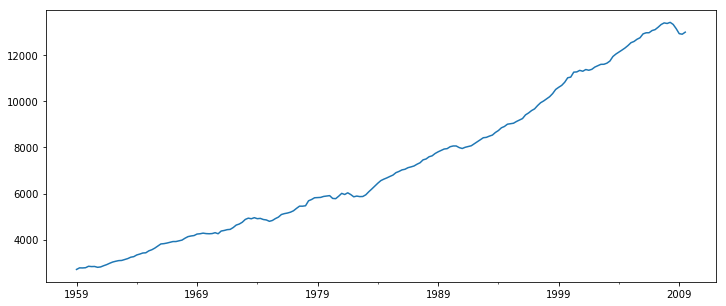

In [4]:
df['realgdp'].plot(figsize=(12, 5));

# Hodrick-Prescott filter
- Hodrick-prescott filter는 time series $y_t$를 트랜드 성분 $\tau_t$와 cycle 성분인 $c_t$로 나눌 수 있게 한다.

$$y_t=\tau_t+c_t$$

- 성분들은 아래의 loss function을 최소화하는 방향으로 결정이 되며 $\lambda$는 smoothing 파라미터다.

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

- $\lambda$의 값은 trend 성분의 성장률 변동을 처리한다.
- 분기별 데이터를 분석할 떄는 기본 $\lambda$값 1600이 권장되며
- 연간 데이터의 경우 6.25, 월별 데이터의 경우 129,600을 사용한다.

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [7]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [8]:
type(gdp_cycle)

pandas.core.series.Series

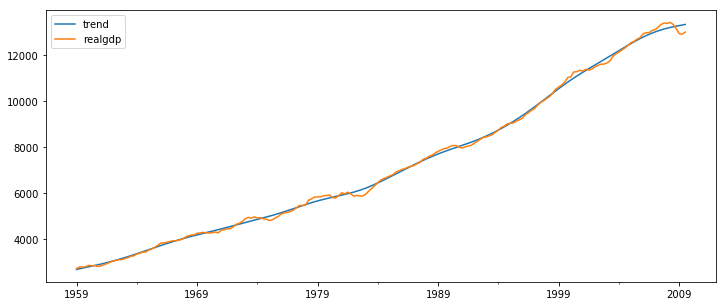

In [14]:
df['trend'] = gdp_trend
df[['trend','realgdp']].plot(figsize=(12, 5));

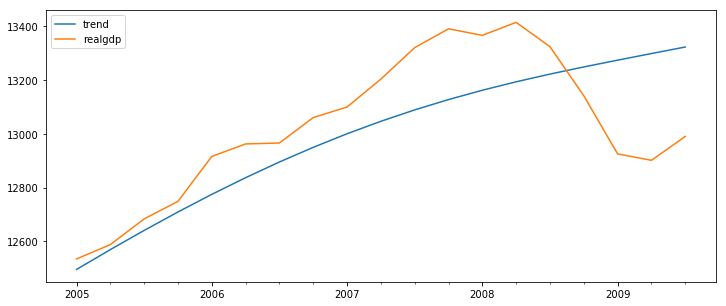

In [13]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12, 5));